<h1 style='text-align:center'>Titanic</h1>
<br>

![](https://thumbs-prod.si-cdn.com/p3ng346qiDkWTpGbYWX_LAfhl5k=/fit-in/1600x0/https://public-media.si-cdn.com/filer/d6/e1/d6e133fd-2a8f-42b6-bc1a-12076f6d498c/screen_shot_2016-02-03_at_15114_pm.png)

The sinking of the Titanic has been dubbed the tradegy that define a century. <br><br>

**What does this have to do with Machine Learning?**

We can use machine learning tools to explore and analysis the survival rate of people on board the titanic. With dataset from Kraggle, this notebook analysis the relations between class and survival, sex and survival, and uses 3 machine learning algorithms/models to predict the survial rate. 


### Import the data

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#import train and test data.
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
name=train.Name
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The data has been split into two groups:
- training set (train.csv)
- test set(test.csv)
<br>

The training set includes passengers survival status and other demographics like gender, class, fare and pclass.
The test set will be used to test how well our models predict the survial rate.
<br><br>

<h4>Variable Definition Key.</h4>
- Survival
 - 0= No
 - 1= Yes
- pclass (Ticket class)
 - 1=1st
 - 2=2nd
 - 3=3rd
 
- sex
<br>

- age


- sibsp (# of siblings / spouses aboard the Titanic)
<br>
- parch (# of parents / children aboard the Titanic)
<br>
- tickets
<br>
- fare
<br>
- cabin
- embarked Port of Embarkation.
 - C = Cherbourg,
 - Q = Queenstown,
 - S = Southampton
- pclass: A proxy for socio-economic status (SES)
<br>
<h4>This is important to remember and will come in handy for later analysis.</h4>
 - 1st = Upper
 - 2nd = Middle
 - 3rd = Lower

<h4>There is a lot of information here but we will mainly focus on the realtionship between class, age, gender, fare and the survial rate.</h4>



## Part 1. Cleaning the data.

In [28]:
## Lets againgtake a quick glance of what we are dealing with.
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


It looks like this dataset is quite organized, however, before using this dataset for analyzing and visualizing we need to deal with ..
- Different variables
- Null values

## Different variables present in the datasets.
 - **There are four type of variables**
  - **Numerical Features**: Age, Fare, SibSp and Parch
  - **Categorical Features**: Sex, Embarked, Survived and Pclass
  - **Alphanumeric Features**: Ticket and Cabin(Contains both alphabets and the numeric value)
  - **Text Features**: Name

** We really need to tweak these features so we get the desired form of input data**

In [29]:
train.shape# Means 891 rows and 12 columns.

(891, 12)

In [30]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We see Age  and Cabin have a lot of missing value.So First we need to deal with all these NaN values.
- As in Cabin column about 1\3rd of the values are missing.So we get rid of this column. 
<br>

## Why missing values treatment is required?
Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction or classification.
- Here the methods to deal with missing values.

### KNN Imputation. 
------
In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing.

For more...
<br>
**Method 1**
- [KNN Imputation](https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/)
- [Blog](https://towardsdatascience.com/the-use-of-knn-for-missing-values-cf33d935c637)

**Method 2**
- [sklearn.preprocessing.Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html)


**We use the Method 2 i.e(sklearn.preprocessing.Imputer)**

Just because it is easy to use....


In [31]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer
Imp=Imputer(missing_values='NaN',strategy='median',axis=1)
new=Imp.fit_transform(train.Age.values.reshape(1,-1))
train['Age2']=new.T
#Lets drop the old one age Column.


C:\Users\gabby\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [32]:
train.drop('Age',axis=1,inplace=True)


In [33]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age2             0
dtype: int64

In [34]:
train.set_index('PassengerId',inplace=True)
## get dummy variables for Column sex and embarked since they are categorical value.
train = pd.get_dummies(train, columns=["Sex"], drop_first=True)
train = pd.get_dummies(train, columns=["Embarked"],drop_first=True)


#Mapping the data.
train['Fare'] = train['Fare'].astype(int)
train.loc[train.Fare<=7.91,'Fare']=0
train.loc[(train.Fare>7.91) &(train.Fare<=14.454),'Fare']=1
train.loc[(train.Fare>14.454)&(train.Fare<=31),'Fare']=2
train.loc[(train.Fare>31),'Fare']=3

train['Age2']=train['Age2'].astype(int)
train.loc[ train['Age2'] <= 16, 'Age2']= 0
train.loc[(train['Age2'] > 16) & (train['Age2'] <= 32), 'Age2'] = 1
train.loc[(train['Age2'] > 32) & (train['Age2'] <= 48), 'Age2'] = 2
train.loc[(train['Age2'] > 48) & (train['Age2'] <= 64), 'Age2'] = 3
train.loc[train['Age2'] > 64, 'Age2'] = 4

In [35]:
# In our data the Ticket and Cabin,Name are the base less,leds to the false prediction so Drop both of them.
train.drop(['Ticket','Cabin','Name'],axis=1,inplace=True)
train.head()
print(type(train.Age2))

<class 'pandas.core.series.Series'>


<h2 >Exploratory Data Analysis</h2>.

**Exploratory data analysis (EDA)** is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.


In [36]:
train.shape
# 891 rows and 9 columns.

(891, 9)

In [37]:
train.Survived.value_counts()/len(train)*100
#This signifies almost 61% people in the ship died and 38% survived.

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [39]:
train.groupby('Survived').mean()

,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
Survived,,,,,,,,
0,2.531876,0.553734,0.329690,1.185792,1.31694,0.852459,0.085610,0.777778
1,1.950292,0.473684,0.464912,1.883041,1.24269,0.318713,0.087719,0.634503


In [40]:
train.groupby('Sex_male').mean()

,Survived,Pclass,SibSp,Parch,Fare,Age2,Embarked_Q,Embarked_S
Sex_male,,,,,,,,
0,0.742038,2.159236,0.694268,0.649682,1.815287,1.210191,0.114650,0.646497
1,0.188908,2.389948,0.429809,0.235702,1.256499,1.331023,0.071057,0.764298


**Correlation Matrix and Heatmap**
Using the matrix and heatmap we should be able to see what variables have strong correlations which we can begin to explore

In [41]:
train.corr()

,Survived,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.035322,0.081629,0.301792,-0.044492,-0.543351,0.003650,-0.155660
Pclass,-0.338481,1.000000,0.083081,0.018443,-0.660699,-0.358005,0.131900,0.221009,0.081720
SibSp,-0.035322,0.083081,1.000000,0.414838,0.365893,-0.218846,-0.114631,-0.026354,0.070941
Parch,0.081629,0.018443,0.414838,1.000000,0.363097,-0.134014,-0.245489,-0.081228,0.063036
Fare,0.301792,-0.660699,0.365893,0.363097,1.000000,0.113812,-0.237585,-0.227213,-0.035715
Age2,-0.044492,-0.358005,-0.218846,-0.134014,0.113812,1.000000,0.071125,-0.079779,0.016203
Sex_male,-0.543351,0.131900,-0.114631,-0.245489,-0.237585,0.071125,1.000000,-0.074115,0.125722
Embarked_Q,0.003650,0.221009,-0.026354,-0.081228,-0.227213,-0.079779,-0.074115,1.000000,-0.496624
Embarked_S,-0.155660,0.081720,0.070941,0.063036,-0.035715,0.016203,0.125722,-0.496624,1.000000


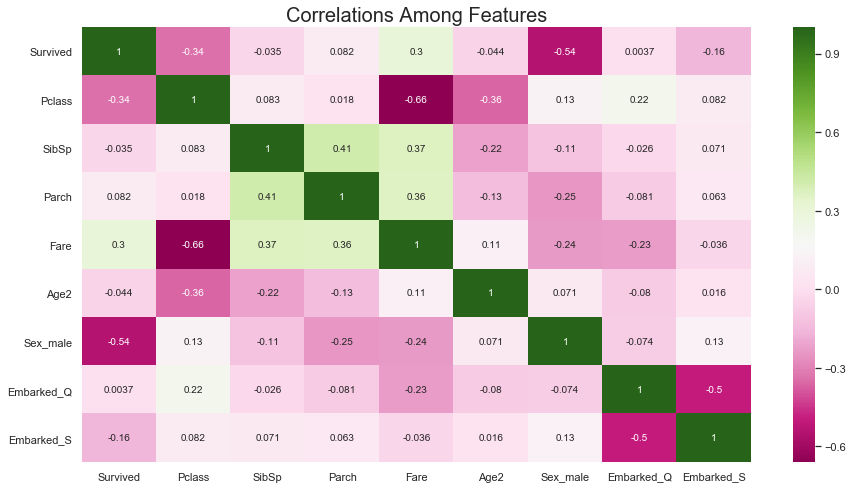

In [42]:
plt.subplots(figsize = (15,8))
sns.heatmap(train.corr(), annot=True,cmap="PiYG")
plt.title("Correlations Among Features", fontsize = 20);

**Positive Correlation Features:**
- Fare and Survived: 0.26.

There is a positive correlation between Fare and Survival which is to be expected as higher class passengers where given priority. 

![](https://static.boredpanda.com/blog/wp-content/uploads/2016/04/titanic-food-menu-first-second-third-class-passengers-fb__700-png.jpg)

**Gender and Survived**


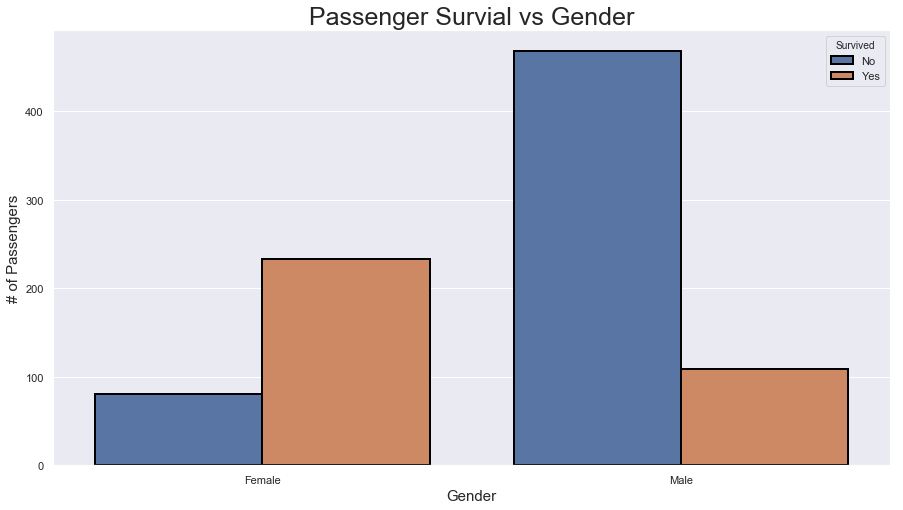

In [79]:
sns.set(style='darkgrid')
plt.subplots(figsize = (15,8))
ax=sns.countplot(x='Sex_male',data=train,hue='Survived',edgecolor=(0,0,0),linewidth=2)
train.shape
## Fixing title, xlabel and ylabel
plt.title('Passenger Survial vs Gender',fontsize=25)
plt.xlabel('Gender',fontsize=15)
plt.ylabel("# of Passengers", fontsize = 15)
labels = ['Female', 'Male']
#Fixing xticks.
plt.xticks(sorted(train.Survived.unique()),labels)
## Fixing legends
leg = ax.get_legend()
leg.set_title('Survived')
legs=leg.texts
legs[0].set_text('No')
legs[1].set_text('Yes')


**Summary**
- Female passengers have survived at a much better rate than male passengers.
- It seems about right since females and children were the priority.
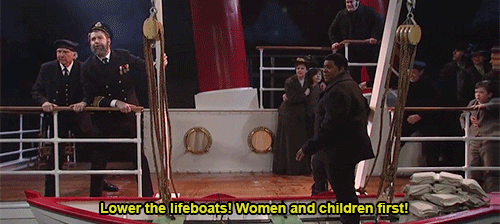


**Pclass and Survived**

In [44]:
train.head(4)

,Survived,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,1,0,0,1,1,0,1
2,1,1,1,0,3,2,0,0,0
3,1,3,0,0,0,1,0,0,1
4,1,1,1,0,3,2,0,0,1


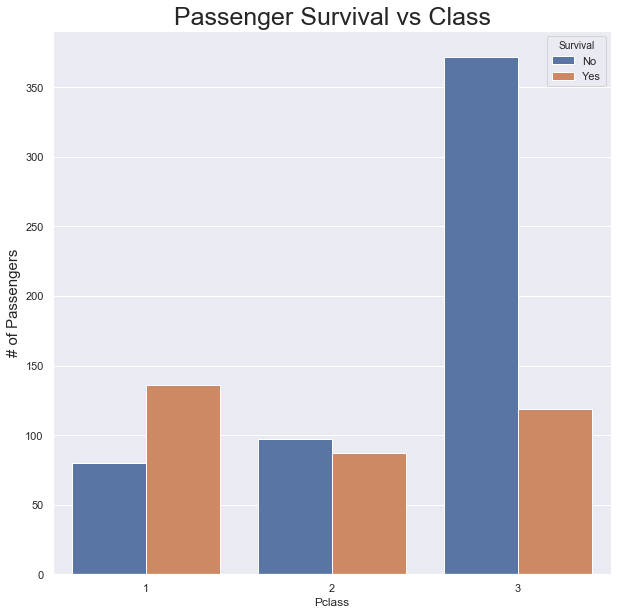

In [78]:
plt.subplots(figsize = (10,10))
ax=sns.countplot(x='Pclass',hue='Survived',data=train)
plt.title("Passenger Survival vs Class", fontsize = 25)
plt.ylabel("# of Passengers", fontsize = 15)
leg=ax.get_legend()
leg.set_title('Survival')
legs=leg.texts

legs[0].set_text('No')
legs[1].set_text("Yes")

**Summary**

First class passenger had the upper hand during the tragedy than second and third class passengers. 

Not hard to imagine but the lowest rate of survial was 3rd class, while 1st had a higher survial to death rate and 2nd class had an almost equal ratio. 

**Fare and Survived**

Text(0.5,0,'Fare')

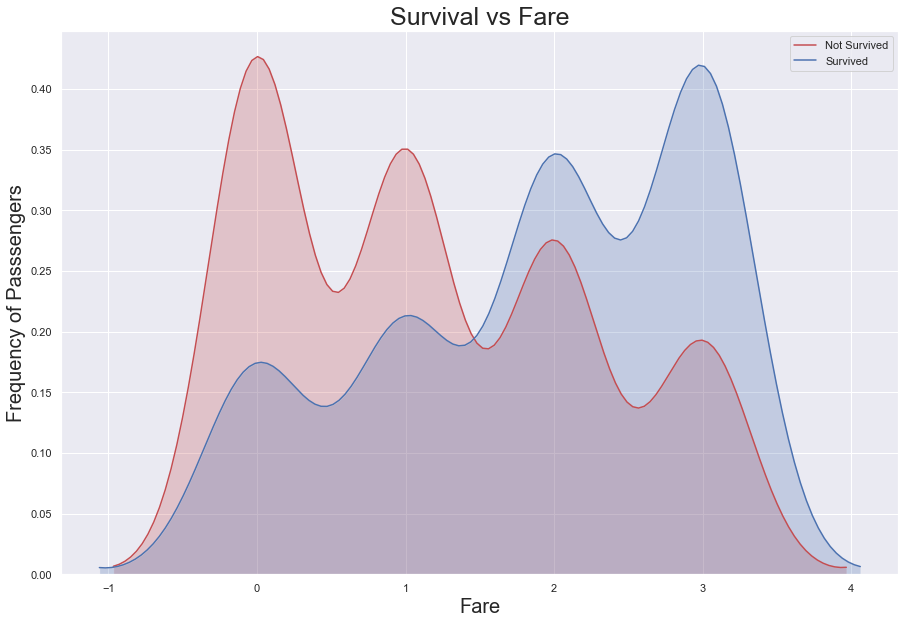

In [81]:
plt.subplots(figsize=(15,10))

ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Fare'],color='r',shade=True,label='Not Survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Fare'],color='b',shade=True,label='Survived' )
plt.title('Survival vs Fare',fontsize=25)
plt.ylabel('Frequency of Passsengers',fontsize=20)
plt.xlabel('Fare',fontsize=20)

**Summary**
Not a lot to add here, as we've already mentioned that lower fare correlates to a lower class which makes sense for why people who paid less had a lower chance of survival.

**Modeling the Data**
Training the data with the following models:
- Logistic Regression
- Gaussian Naive Bayes
- Support Vector Machines


In [82]:
X=train.drop('Survived',axis=1)
y=train['Survived'].astype(int)


<h2>Classifier Comparision</h2>

Scikit-learn has a library called Classifier Comparison  which will allow us to choose which model best for the given data.

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis 


classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100, max_features=3),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]
    


log_cols = ["Classifier", "Accuracy"]
log= pd.DataFrame(columns=log_cols)


In [84]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
acc_dict = {}

for train_index, test_index in sss.split(X, y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    for clf in classifiers:
        name = clf.__class__.__name__
    
        clf.fit(X_train,y_train)
        predict=clf.predict(X_test)
        acc=accuracy_score(y_test,predict)
        if name in acc_dict:
            acc_dict[name]+=acc
        else:
            acc_dict[name]=acc

Text(0.5,1,'Classifier Accuracy')

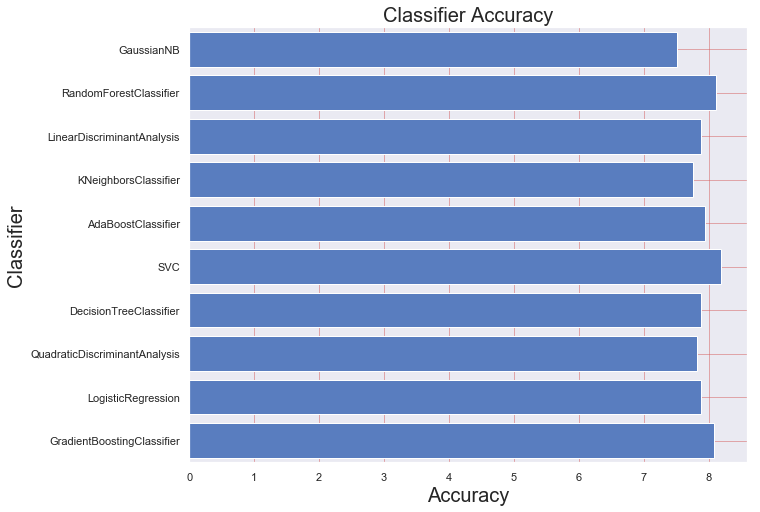

In [85]:
log['Classifier']=acc_dict.keys()
log['Accuracy']=acc_dict.values()
log.set_index([[0,1,2,3,4,5,6,7,8,9]])
%matplotlib inline
sns.set_color_codes("muted")
ax=plt.subplots(figsize=(10,8))
ax=sns.barplot(y='Classifier',x='Accuracy',data=log,color='b')
ax.set_xlabel('Accuracy',fontsize=20)
plt.ylabel('Classifier',fontsize=20)
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.title('Classifier Accuracy',fontsize=20)


From the above barplot, we can clearly see that the accuracy of the SVC classifier is best out of all other classifiers..

Lets apply this to our test data.

<h2>Prediction</h2>

Let's use the SVC classifier to predict our data.

In [86]:
train.head()

,Survived,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,1,0,0,1,1,0,1
2,1,1,1,0,3,2,0,0,0
3,1,3,0,0,0,1,0,0,1
4,1,1,1,0,3,2,0,0,1
5,0,3,0,0,1,2,1,0,1


In [87]:
classifier=SVC()
xtrain=train.iloc[:,1:]
ytrain=train.iloc[:,:1]
ytrain=ytrain.values.ravel()
classifier.fit(xtrain,ytrain)
#we need to convert the test data 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [88]:
testIm=Imputer(missing_values='NaN',strategy='most_frequent',axis=1)
Age1=testIm.fit_transform(test.Age.values.reshape(1,-1))
Fare2=testIm.fit_transform(test.Fare.values.reshape(1,-1))
test.drop(['Name','Cabin','Age','Ticket','Fare'],axis=1,inplace=True)
test['Age1']=Age1.T
test['Fare2']=Fare2.T
test.set_index('PassengerId',inplace=True)
#test[test.Fare.isnull()]#this will tell us which row have null so we can drop that particular row.
#test.drop([1044],axis=0,inplace=True)#drop the row which NaN .
#test.isnull().sum()

C:\Users\gabby\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


AttributeError: 'DataFrame' object has no attribute 'Age'

In [89]:
## get dummy variables for Column sex and embarked since they are categorical value.
test = pd.get_dummies(test, columns=["Sex"], drop_first=True)
test = pd.get_dummies(test, columns=["Embarked"],drop_first=True)


#Mapping the data.
test['Fare2'] = test['Fare2'].astype(int)
test.loc[test.Fare2<=7.91,'Fare2']=0
test.loc[(test.Fare2>7.91) &(test.Fare2<=14.454),'Fare2']=1
test.loc[(test.Fare2>14.454)&(test.Fare2<=31),'Fare2']=2
test.loc[(test.Fare2>31),'Fare2']=3

test['Age1']=test['Age1'].astype(int)
test.loc[ test['Age1'] <= 16, 'Age1']= 0
test.loc[(test['Age1'] > 16) & (test['Age1'] <= 32), 'Age1'] = 1
test.loc[(test['Age1'] > 32) & (test['Age1'] <= 48), 'Age1'] = 2
test.loc[(test['Age1'] > 48) & (test['Age1'] <= 64), 'Age1'] = 3
test.loc[test['Age1'] > 64, 'Age1'] = 4

KeyError: u"None of [Index([u'Sex'], dtype='object')] are in the [columns]"

<h2>Result</h2>

The final result is

In [90]:
Result=classifier.predict(test)
print(Result)
print(len(Result))

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
418


<h2>Other Models</h2>

Testing other models such as Gradient Boost and Linear Regression 

In [65]:
classifier=GradientBoostingClassifier()
xtrain=train.iloc[:,1:]
ytrain=train.iloc[:,:1]
ytrain=ytrain.values.ravel()
classifier.fit(xtrain,ytrain)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [66]:
Result=classifier.predict(test)
print(Result)
print(len(Result))

[1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0
 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0
 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1
 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1
 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0
 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0
 0 1 1 1 1 0 0 1 0 0 0]
418


In [67]:
classifier=LogisticRegression()
xtrain=train.iloc[:,1:]
ytrain=train.iloc[:,:1]
ytrain=ytrain.values.ravel()
classifier.fit(xtrain,ytrain)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [68]:
Result=classifier.predict(test)
print(Result)
print(len(Result))

[0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 0 1 1 1 0 1 0 0 0]
418
